In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the training and validation datasets
training_data = pd.read_csv("C:\\Users\\User\\Downloads\\archive\\twitter_training.csv", header=None, names=['ID', 'Entity', 'Sentiment', 'Message'])
validation_data = pd.read_csv("C:\\Users\\User\\Downloads\\archive\\twitter_validation.csv", header=None, names=['ID', 'Entity', 'Sentiment', 'Message'])



In [3]:
# Concatenate training and validation datasets for analysis
data = pd.concat([training_data, validation_data])



In [4]:
# Data Preprocessing
# Convert sentiment labels to numerical values
sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1, 'Irrelevant': 0}
data['Sentiment'] = data['Sentiment'].map(sentiment_mapping)



In [5]:
# Drop rows with missing values
data.dropna(subset=['Message'], inplace=True)
# Fill missing values with an empty string
data['Message'].fillna('', inplace=True)
# Feature Engineering
# Vectorize the text data using Bag-of-Words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Message'])
y = data['Sentiment']



Accuracy: 0.9227333333333333
Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.92      0.93      4464
           0       0.91      0.94      0.92      6372
           1       0.92      0.90      0.91      4164

    accuracy                           0.92     15000
   macro avg       0.92      0.92      0.92     15000
weighted avg       0.92      0.92      0.92     15000



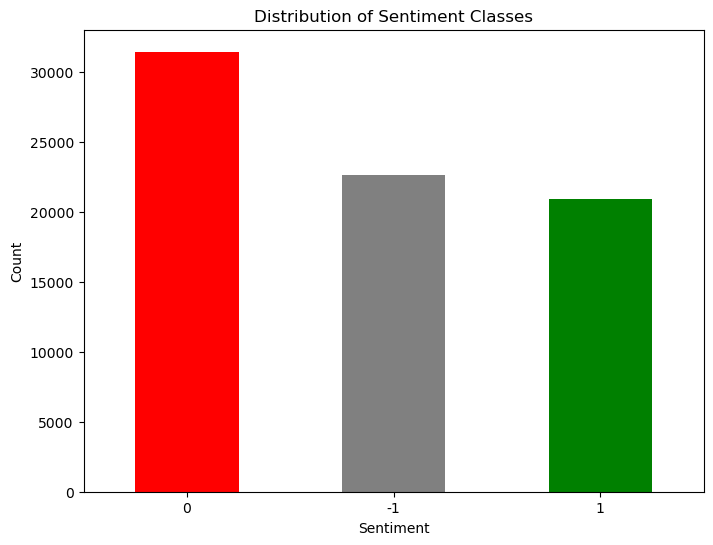

In [5]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_val, y_pred))

# Visualize sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [7]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 812.7 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


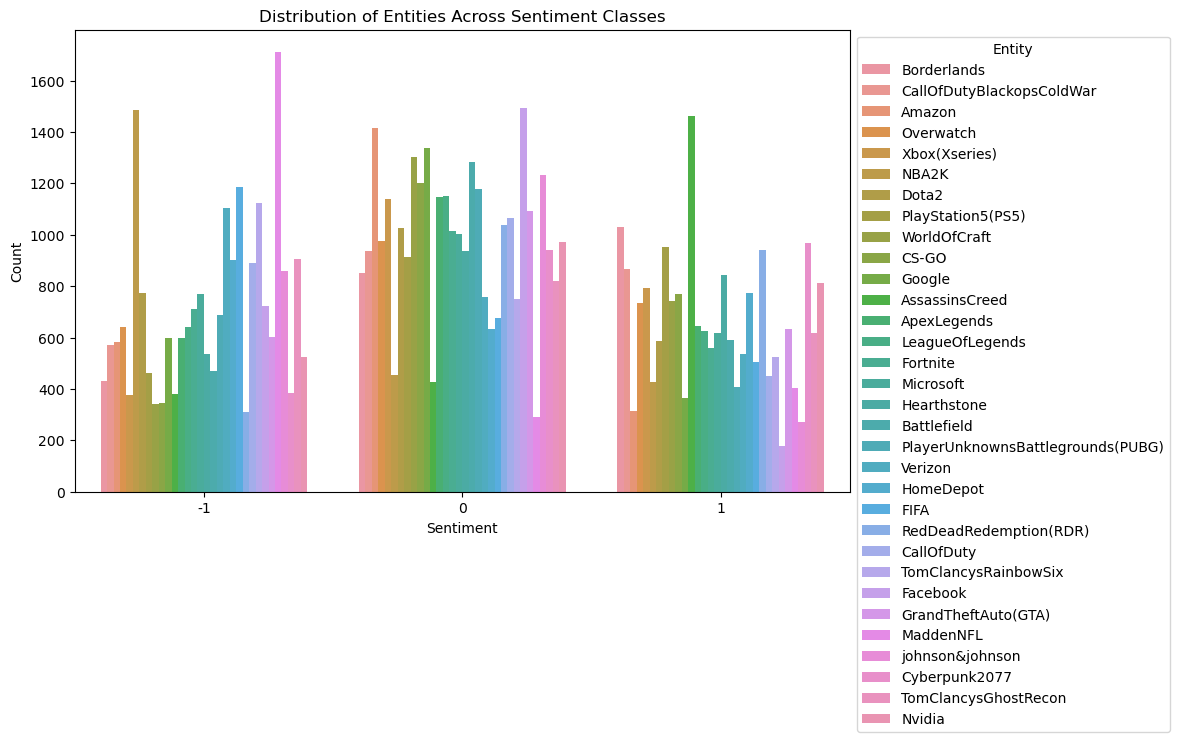

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


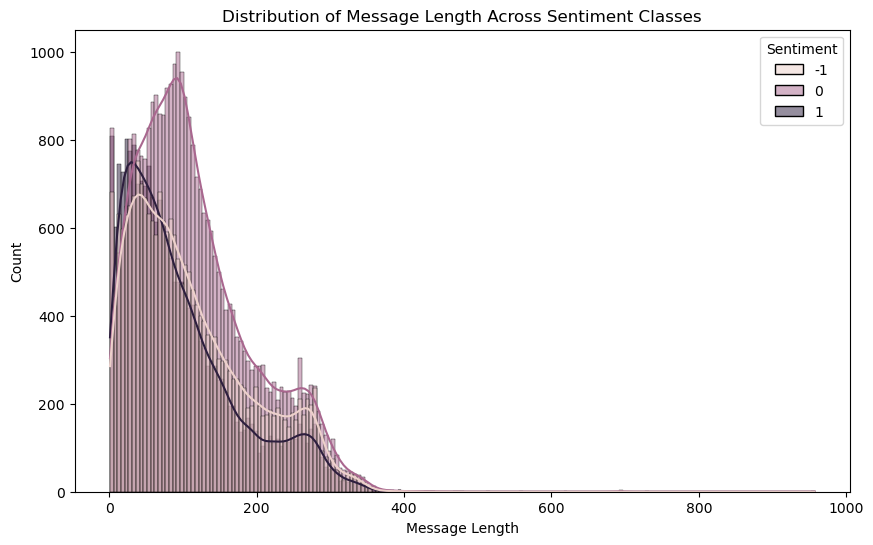

In [7]:
from wordcloud import WordCloud
import seaborn as sns

def generate_word_cloud(sentiment_label):
    text = ' '.join(data[data['Sentiment'] == sentiment_label]['Message'])
    if text:  # Check if text is not empty
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {sentiment_label} Sentiment')
        plt.axis('off')
        plt.show()
    else:
        print(f"No words available for {sentiment_label} sentiment.")


# Entity Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', hue='Entity', data=data)
plt.title('Distribution of Entities Across Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Entity', bbox_to_anchor=(1, 1))
plt.show()

# Message Length Analysis
data['Message_Length'] = data['Message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Message_Length', hue='Sentiment', kde=True)
plt.title('Distribution of Message Length Across Sentiment Classes')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()


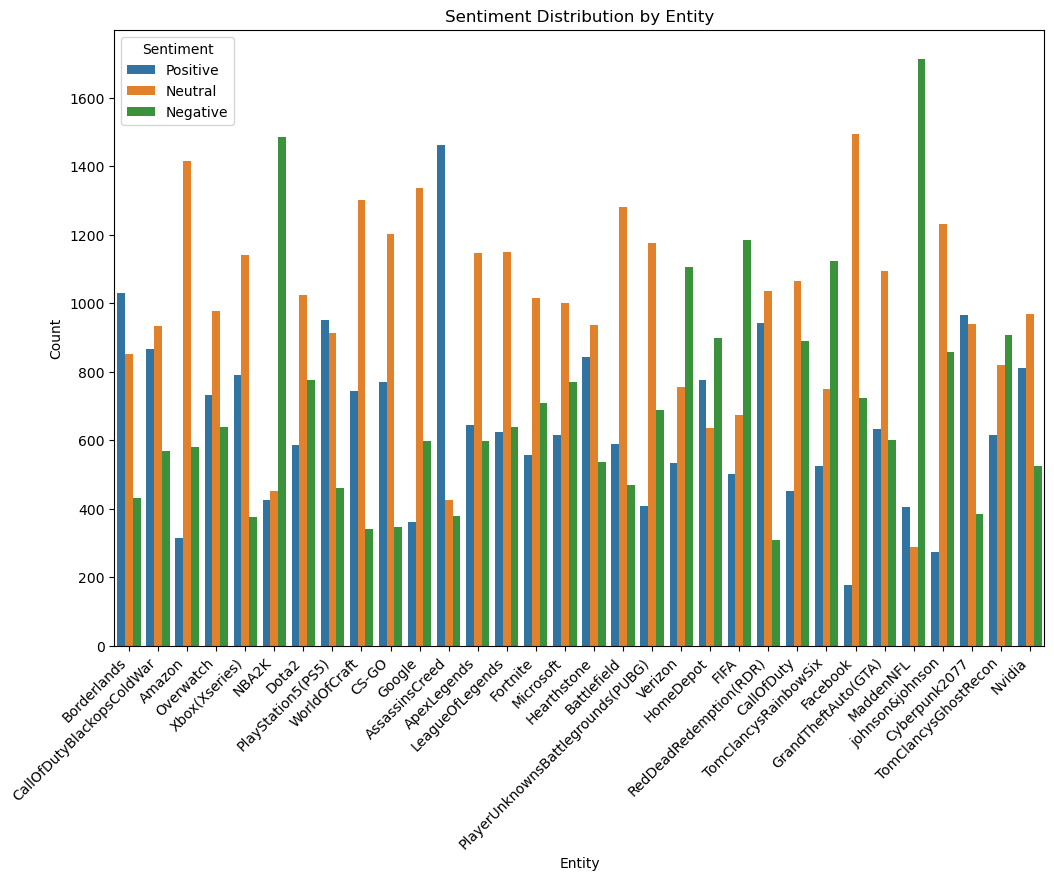

In [9]:
# Convert sentiment labels back to string
sentiment_mapping_inv = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
data['Sentiment_str'] = data['Sentiment'].map(sentiment_mapping_inv)

# Bar Plot of Sentiment Distribution by Entity
plt.figure(figsize=(12, 8))
sns.countplot(x='Entity', hue='Sentiment_str', data=data)
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()




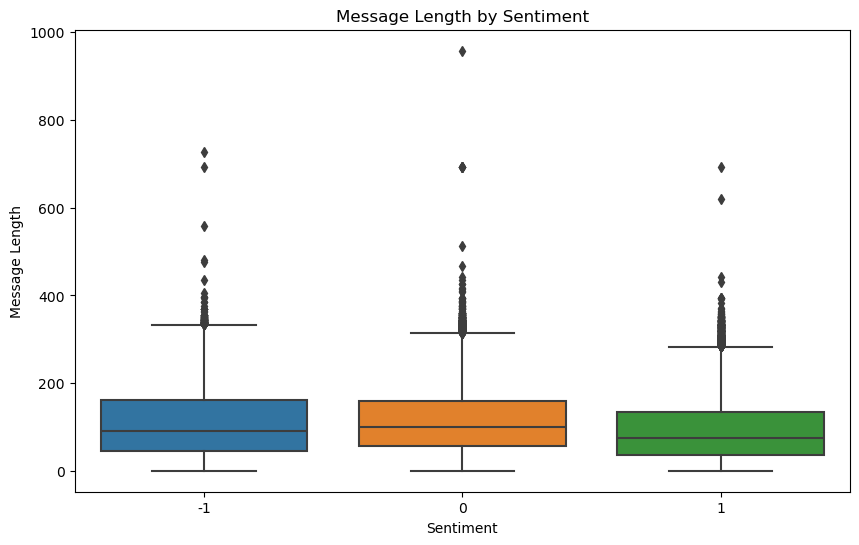

In [10]:
# Box Plot of Message Length by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Message_Length', data=data)
plt.title('Message Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Message Length')
plt.show()
